Setup
--

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

We gonna use `Iris dataset` to `illustrate Logistic regression`

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys()) #looking at the keys

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
print(iris.DESCR) # looking at the dataset description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(iris.feature_names) #looking at the features description

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
x = iris['data'][:, 3:] #getting the petal width 
y = (iris['target'] == 2).astype(int) #  1 if the iris virginica, else is 0

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg  = LogisticRegression(solver='lbfgs', random_state=42)
log_reg.fit(x, y)

LogisticRegression(random_state=42)

Saving figure Logistic_regression_plot


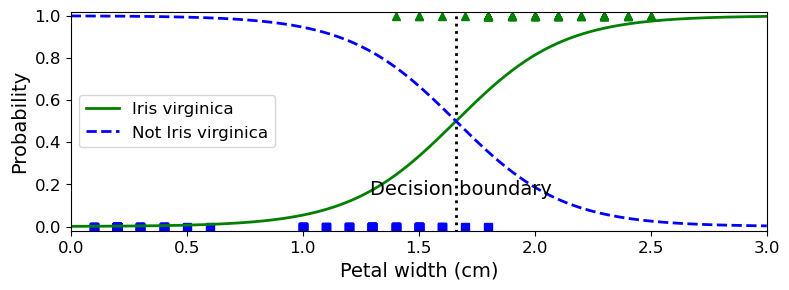

In [9]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:,1] >= 0.5][0] # setting boundary description

plt.figure(figsize=(8, 3)) #setting the fig size
plt.plot(x[y==0], y[y==0], 'bs')
plt.plot(x[y==1], y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
plt.plot(x_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica')
plt.plot(x_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris virginica')
plt.text(decision_boundary+0.02, 0.15, 'Decision boundary', fontsize=14, color='k', ha='center')
#plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
#plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel('Petal width (cm)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(loc='center left', fontsize=12)
plt.axis([0, 3, -0.02, 1.02])
save_fig('Logistic_regression_plot')

plt.show()

In [10]:
decision_boundary

array([1.66066066])

In [11]:
log_reg.predict([[1.7],[1.5]])


array([1, 0])

Let's try the counter plot for logistic regression and also visualize the boundaries.

Saving figure Logistic_regression_countour_plot


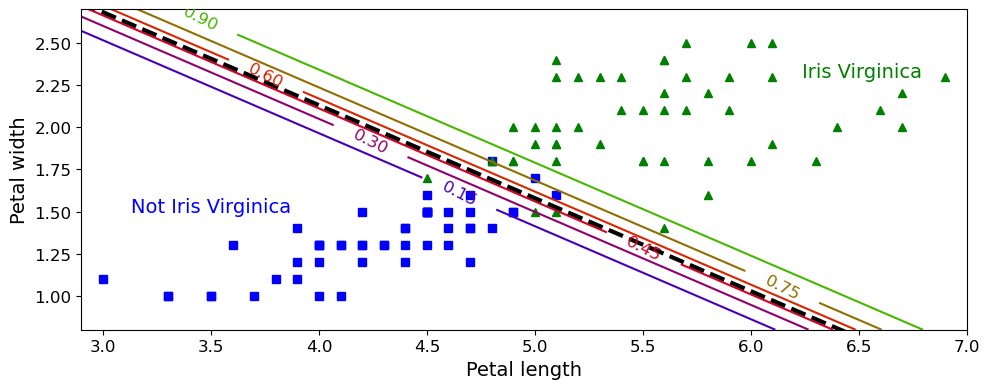

In [12]:
from sklearn.linear_model import LogisticRegression

x = iris['data'][:,(2, 3)] # for petal length, petal width
y = (iris['target'] == 2).astype(int)

log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
log_reg.fit(x,y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1))
x_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0],x[y==0, 1], 'bs')
plt.plot(x[y==1, 0],x[y==1, 1], 'g^')

zebra = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zebra, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)
plt.text(3.5, 1.5, 'Not Iris Virginica', fontsize=14, color='b', ha='center')
plt.text(6.5, 2.3, ' Iris Virginica', fontsize=14, color='g', ha='center')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig('Logistic_regression_countour_plot')

plt.show()

Softmax regression
--

In [13]:
#for the softmax regression
x = iris['data'][:,(2,3)] # petal length and petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)
softmax_reg.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Saving figure Softmax_regression_decision_boundaries


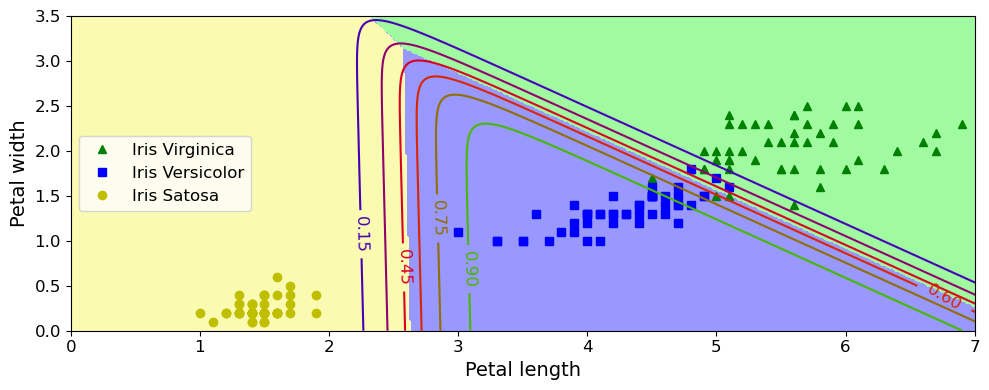

In [15]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1,1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

zebra1 = y_proba[:, 1].reshape(x0.shape)
zebra2 = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==2, 0], x[y==2, 1], 'g^', label='Iris Virginica')
plt.plot(x[y==1, 0], x[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(x[y==0, 0], x[y==0, 1], 'yo', label='Iris Satosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zebra2, cmap=custom_cmap)
contour = plt.contour(x0, x1, zebra1,cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='center left', fontsize=12)
plt.axis([0, 7, 0, 3.5])
save_fig('Softmax_regression_decision_boundaries')

plt.show()

In [16]:
softmax_reg.predict([[3,3]])
##################################
#      class0== Iris Satosa
#      class1== Iris versicolor
#      class2== Iris Virginica
#here we are able to predict the class of Iris Flower species 
#basing on the petal length and the petal width
##################################

array([2])

In [17]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [18]:
from sklearn.model_selection import cross_val_score

softmax_reg_scores = cross_val_score(softmax_reg, x, y, cv=10)
softmax_reg_scores.mean()

0.96

In [19]:
log_reg_scores = cross_val_score(log_reg, x, y, cv=10)
log_reg_scores.mean()

0.9533333333333334

Model deployment
--

In [20]:
results = pd.DataFrame({
    'Model': ['Softmax Regression','Logistic Regression'], 
    'Score': [0.96,0.9533333333333334],
})

results

,Model,Score
0,Softmax Regression,0.960000
1,Logistic Regression,0.953333


In [21]:
# To save the model in a pkl file. 

import pickle as pkl
model= softmax_reg

pkl.dump(model, open('model.pkl', 'wb'))

In [26]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
